In [13]:
#kütüphane import etme islemi
import sys 
import numpy as np 
import pandas as pd 
import matplotlib as plt
import seaborn as sns 
import sklearn 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [14]:
#veriseti okuma işlemi
data = pd.read_csv("C:/Users/Burcu/Desktop/covtype.data")

# verisetinin ilk 3 satırını okuma işlemi
data.head(3)

,2596,51,3,258,0,510,221,232,148,6279,...,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,5
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2


In [38]:
data.dropna()

,Yükseklik,Cephe,Eğim,Suya_Yatay_Mesafe,Suya_Dikey_Mesafe,Yollara_Mesafe,Tepe_Gölgesi_Sabah9,Tepe_Gölgesi_Öğlen,Tepe_Gölgesi_Öğlen3,Yangın_Noktalarına_Yatay_Mesafe,...,Toprak_Tipi32,Toprak_Tipi33,Toprak_Tipi34,Toprak_Tipi35,Toprak_Tipi36,Toprak_Tipi37,Toprak_Tipi38,Toprak_Tipi39,Toprak_Tipi40,Örtü_Tipi
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [39]:
data.shape

(581011, 55)

In [15]:
#sütunlara isim verdirme
oznitelik_isimleri = ['Yükseklik', 'Cephe', 'Eğim', 'Suya_Yatay_Mesafe', 'Suya_Dikey_Mesafe', 'Yollara_Mesafe', 
                 'Tepe_Gölgesi_Sabah9', 'Tepe_Gölgesi_Öğlen', 'Tepe_Gölgesi_Öğlen3', 'Yangın_Noktalarına_Yatay_Mesafe', 'Vahşi_Alan1', 'Vahşi_Alan2', 
                'Vahşi_Alan3', 'Vahşi_Alan4', 'Toprak_Tipi1', 'Toprak_Tipi2', 'Toprak_Tipi3', 'Toprak_Tipi4', 'Toprak_Tipi5', 'Toprak_Tipi6', 'Toprak_Tipi7',
                'Toprak_Tipi8', 'Toprak_Tipi9', 'Toprak_Tipi10', 'Toprak_Tipi11', 'Toprak_Tipi12', 'Toprak_Tipi13', 'Toprak_Tipi14', 'Toprak_Tipi15', 'Toprak_Tipi16', 
                 'Toprak_Tipi17', 'Toprak_Tipi18', 'Toprak_Tipi19', 'Toprak_Tipi20', 'Toprak_Tipi21', 'Toprak_Tipi22', 'Toprak_Tipi23', 'Toprak_Tipi24', 'Toprak_Tipi25', 
                 'Toprak_Tipi26', 'Toprak_Tipi27', 'Toprak_Tipi28', 'Toprak_Tipi29', 'Toprak_Tipi30', 'Toprak_Tipi31', 'Toprak_Tipi32', 'Toprak_Tipi33', 'Toprak_Tipi34', 
                 'Toprak_Tipi35', 'Toprak_Tipi36', 'Toprak_Tipi37', 'Toprak_Tipi38', 'Toprak_Tipi39', 'Toprak_Tipi40', 'Örtü_Tipi']

# Feeding column names to the data
data.columns = oznitelik_isimleri

In [17]:
# olusan yeni verisetinin ilk 5 satırını okuma işlemi
data.head(5)


,Yükseklik,Cephe,Eğim,Suya_Yatay_Mesafe,Suya_Dikey_Mesafe,Yollara_Mesafe,Tepe_Gölgesi_Sabah9,Tepe_Gölgesi_Öğlen,Tepe_Gölgesi_Öğlen3,Yangın_Noktalarına_Yatay_Mesafe,...,Toprak_Tipi32,Toprak_Tipi33,Toprak_Tipi34,Toprak_Tipi35,Toprak_Tipi36,Toprak_Tipi37,Toprak_Tipi38,Toprak_Tipi39,Toprak_Tipi40,Örtü_Tipi
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2


In [18]:
# veri boyutları nerelerde x gözlem olacak ve y hedef değişken içeren öznitelik olacak

x, y = data.shape
print('Bu veri setinde orman örtüsünün türünü tahmin etmek için ', x, ' adet gözlem ve ', y-1, 'adet öznitelik bulunmaktadır.')  # removing count of a target v

Bu veri setinde orman örtüsünün türünü tahmin etmek için  581011  adet gözlem ve  54 adet öznitelik bulunmaktadır.


In [19]:
data.isnull()

,Yükseklik,Cephe,Eğim,Suya_Yatay_Mesafe,Suya_Dikey_Mesafe,Yollara_Mesafe,Tepe_Gölgesi_Sabah9,Tepe_Gölgesi_Öğlen,Tepe_Gölgesi_Öğlen3,Yangın_Noktalarına_Yatay_Mesafe,...,Toprak_Tipi32,Toprak_Tipi33,Toprak_Tipi34,Toprak_Tipi35,Toprak_Tipi36,Toprak_Tipi37,Toprak_Tipi38,Toprak_Tipi39,Toprak_Tipi40,Örtü_Tipi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581007,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581008,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
581009,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Veriden tüm sayısal özellikleri çıkarma
num_fea = data.iloc[:, :10]

# verilerden tüm ikili özellikleri çıkarma
binary_fea = data.iloc[:, 10:-1]


# sayısal özelliklerin istatistikleri
num_fea.describe()

,Yükseklik,Cephe,Eğim,Suya_Yatay_Mesafe,Suya_Dikey_Mesafe,Yollara_Mesafe,Tepe_Gölgesi_Sabah9,Tepe_Gölgesi_Öğlen,Tepe_Gölgesi_Öğlen3,Yangın_Noktalarına_Yatay_Mesafe
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000


In [21]:
# ikili veya kategorik özelliklerin istatistikleri
binary_fea.describe()


,Vahşi_Alan1,Vahşi_Alan2,Vahşi_Alan3,Vahşi_Alan4,Toprak_Tipi1,Toprak_Tipi2,Toprak_Tipi3,Toprak_Tipi4,Toprak_Tipi5,Toprak_Tipi6,...,Toprak_Tipi31,Toprak_Tipi32,Toprak_Tipi33,Toprak_Tipi34,Toprak_Tipi35,Toprak_Tipi36,Toprak_Tipi37,Toprak_Tipi38,Toprak_Tipi39,Toprak_Tipi40
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,...,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000
mean,0.448864,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,0.497379,0.220882,0.495897,0.244088,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121792
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
# çarpık dağılım
data.skew()

Yükseklik                           -0.817602
Cephe                                0.402625
Eğim                                 0.789274
Suya_Yatay_Mesafe                    1.140436
Suya_Dikey_Mesafe                    1.790248
Yollara_Mesafe                       0.713678
Tepe_Gölgesi_Sabah9                 -1.181144
Tepe_Gölgesi_Öğlen                  -1.063054
Tepe_Gölgesi_Öğlen3                 -0.277052
Yangın_Noktalarına_Yatay_Mesafe      1.288636
Vahşi_Alan1                          0.205622
Vahşi_Alan2                          4.061591
Vahşi_Alan3                          0.257819
Vahşi_Alan4                          3.575557
Toprak_Tipi1                        13.736658
Toprak_Tipi2                         8.615351
Toprak_Tipi3                        10.838621
Toprak_Tipi4                         6.625170
Toprak_Tipi5                        18.995227
Toprak_Tipi6                         9.240053
Toprak_Tipi7                        74.367109
Toprak_Tipi8                      

In [23]:
# orman örtüsü türüne göre gruplama ve toplam oluşumun hesaplanması
data.groupby('Örtü_Tipi').size()

Örtü_Tipi
1    211840
2    283301
3     35754
4      2747
5      9492
6     17367
7     20510
dtype: int64

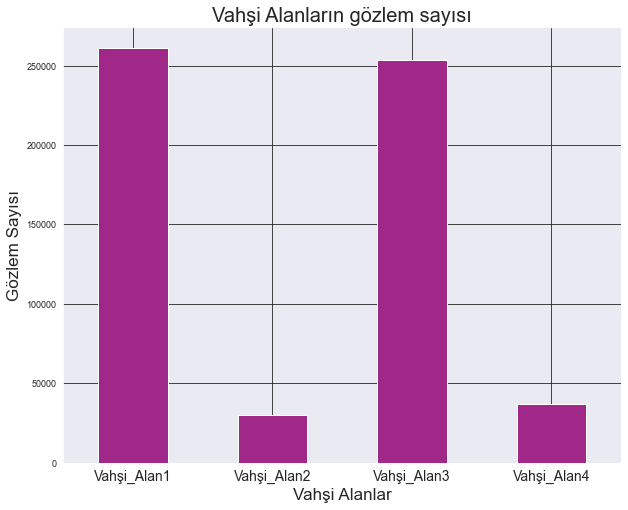

In [25]:
#yapılan toplam gözlem sayısı ile vahşi alanların gözlem sayısının grafiği
plt = matplotlib.pyplot
Vahsi_Alan_Veri, Toprak_Tur_Veri = binary_fea.iloc[:,:4], binary_fea.iloc[:,4:]
sns.set_style("darkgrid", {'grid.color': '.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]
color = sns.color_palette(flatui)
Vahsi_Alan_Veri.sum().plot(kind='bar', figsize=(10, 8), color='#a02888')
plt.title('Vahşi Alanların gözlem sayısı', size = 20)
plt.xlabel('Vahşi Alanlar', size = 17)
plt.ylabel('Gözlem Sayısı', size = 17)
plt.xticks(rotation = 'horizontal', size = 14)
plt.yticks(size = 9)
sns.despine()
plt.show()

In [26]:
# Vahşi Yaşam Alanının toplam sayısı
Vahsi_Alan_Veri.sum()

Vahşi_Alan1    260795
Vahşi_Alan2     29884
Vahşi_Alan3    253364
Vahşi_Alan4     36968
dtype: int64

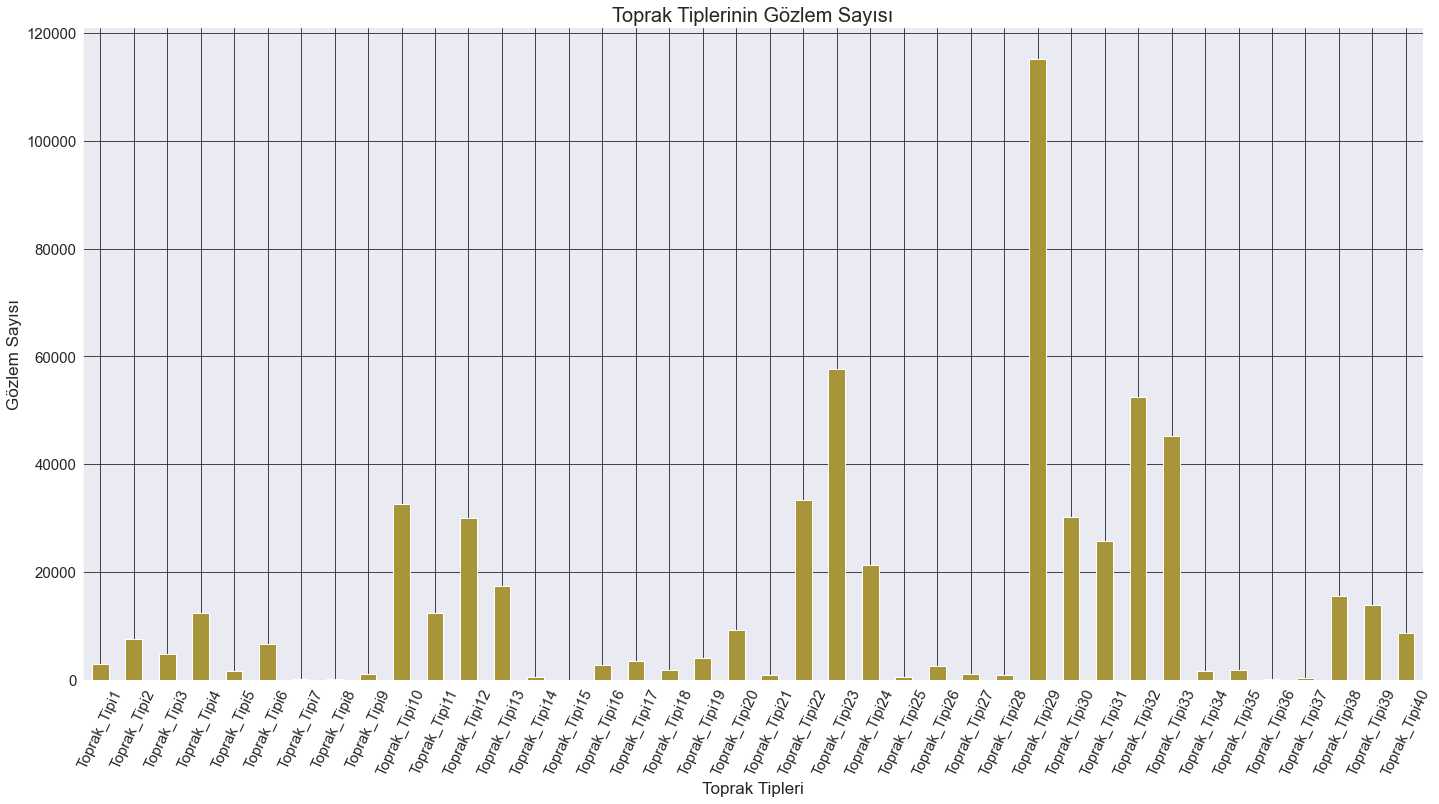

In [27]:
# toprak tiplerinin gözlem sayısı
sns.set_style("darkgrid", {'grid.color': '.1'})
Toprak_Tur_Veri.sum().plot(kind='bar', figsize=(24, 12), color='#a89439')
plt.title('Toprak Tiplerinin Gözlem Sayısı', size = 20)
plt.xlabel('Toprak Tipleri', size = 17)
plt.ylabel('Gözlem Sayısı', size = 17)
plt.xticks(rotation = 65, size = 15)
plt.yticks(size = 15)
sns.despine()

plt.show()

In [28]:
# Görülen Toprak Türüne ilişkin en yüksek gözlemin describe'ı
Toprak_Tur_Veri.loc[:,'Toprak_Tipi29'].describe()

count    581011.000000
mean          0.198354
std           0.398761
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Toprak_Tipi29, dtype: float64

In [31]:
# Toprak türleri özeti
toprak_sum = pd.Series(Toprak_Tur_Veri.sum())
toprak_sum

Toprak_Tipi1       3031
Toprak_Tipi2       7525
Toprak_Tipi3       4823
Toprak_Tipi4      12396
Toprak_Tipi5       1597
Toprak_Tipi6       6575
Toprak_Tipi7        105
Toprak_Tipi8        179
Toprak_Tipi9       1147
Toprak_Tipi10     32634
Toprak_Tipi11     12410
Toprak_Tipi12     29971
Toprak_Tipi13     17431
Toprak_Tipi14       599
Toprak_Tipi15         3
Toprak_Tipi16      2845
Toprak_Tipi17      3422
Toprak_Tipi18      1899
Toprak_Tipi19      4021
Toprak_Tipi20      9259
Toprak_Tipi21       838
Toprak_Tipi22     33373
Toprak_Tipi23     57752
Toprak_Tipi24     21278
Toprak_Tipi25       474
Toprak_Tipi26      2589
Toprak_Tipi27      1086
Toprak_Tipi28       946
Toprak_Tipi29    115246
Toprak_Tipi30     30170
Toprak_Tipi31     25666
Toprak_Tipi32     52519
Toprak_Tipi33     45154
Toprak_Tipi34      1611
Toprak_Tipi35      1891
Toprak_Tipi36       119
Toprak_Tipi37       298
Toprak_Tipi38     15573
Toprak_Tipi39     13806
Toprak_Tipi40      8750
dtype: int64

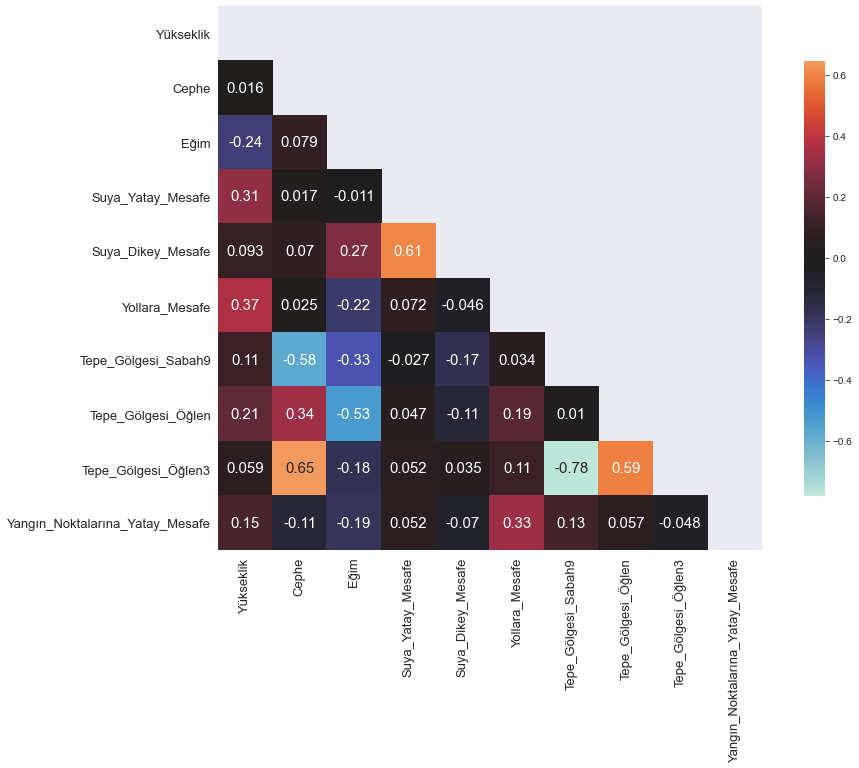

In [32]:
# özniteliklerin ilişkilendirildiği korelasyon matrisi
plt.subplots(figsize=(15, 10))

# Korelasyon matrisini hesaplayın
num_fea_corr = num_fea.corr()

# Üst üçgen için bir maske oluşturma
mask = np.zeros_like(num_fea_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# cbar'ı küçülten bir ısı haritası oluşturma
sns.heatmap(num_fea_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})


plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

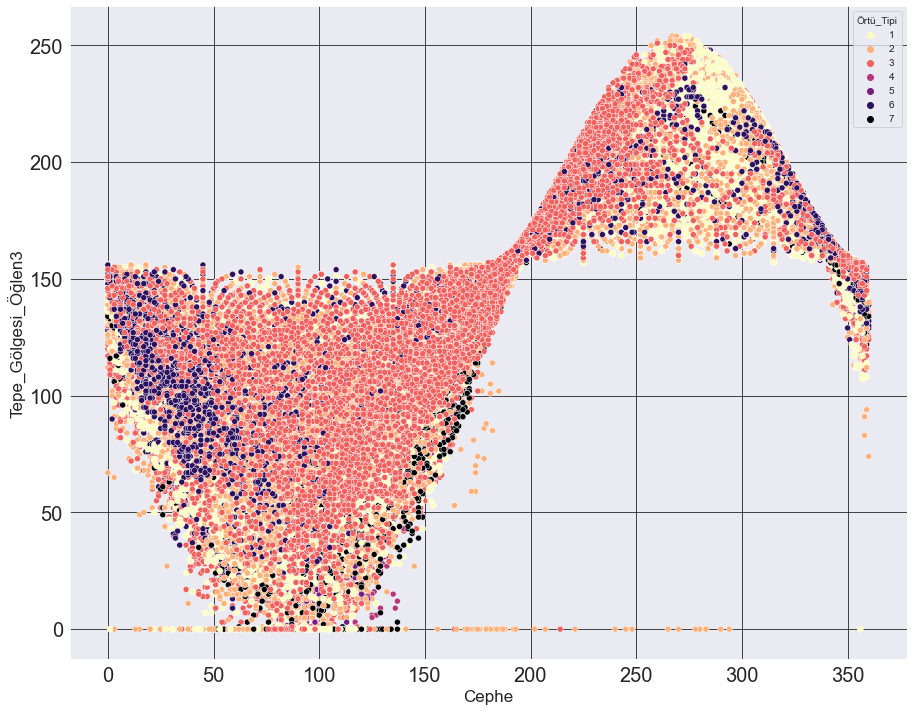

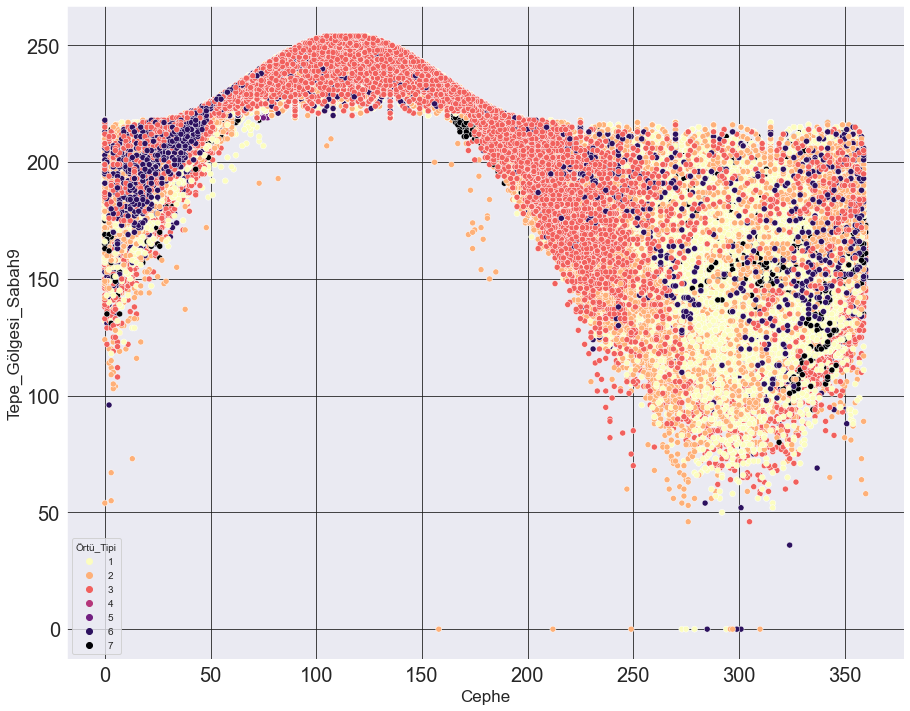

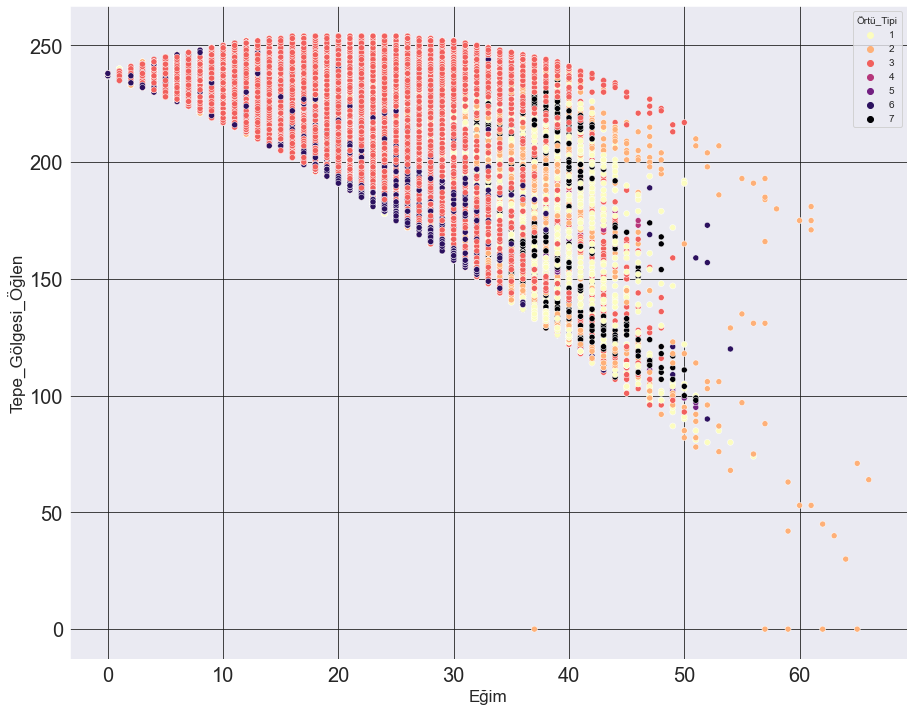

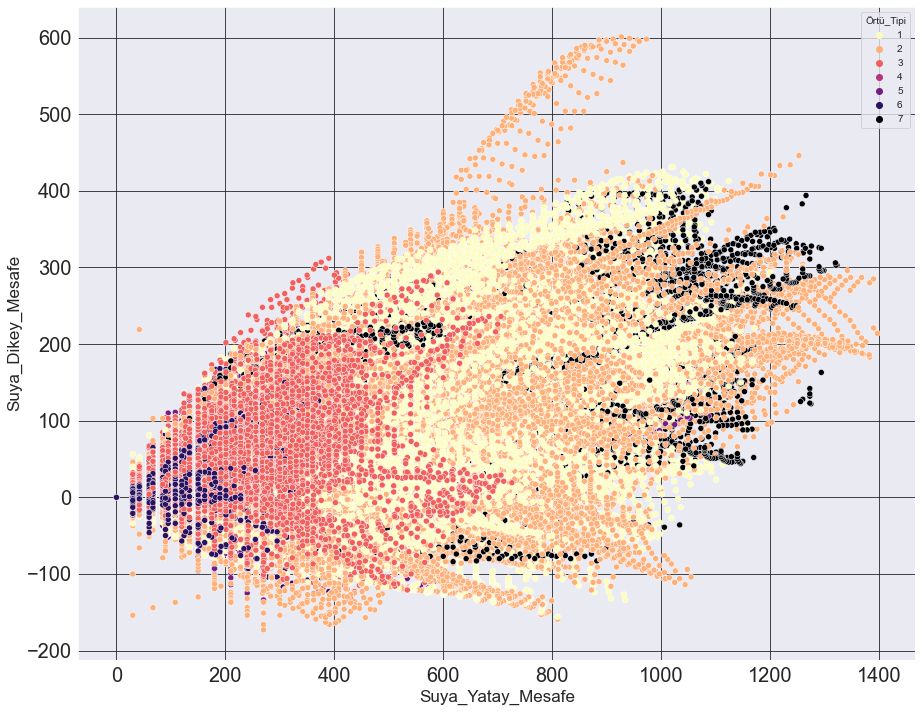

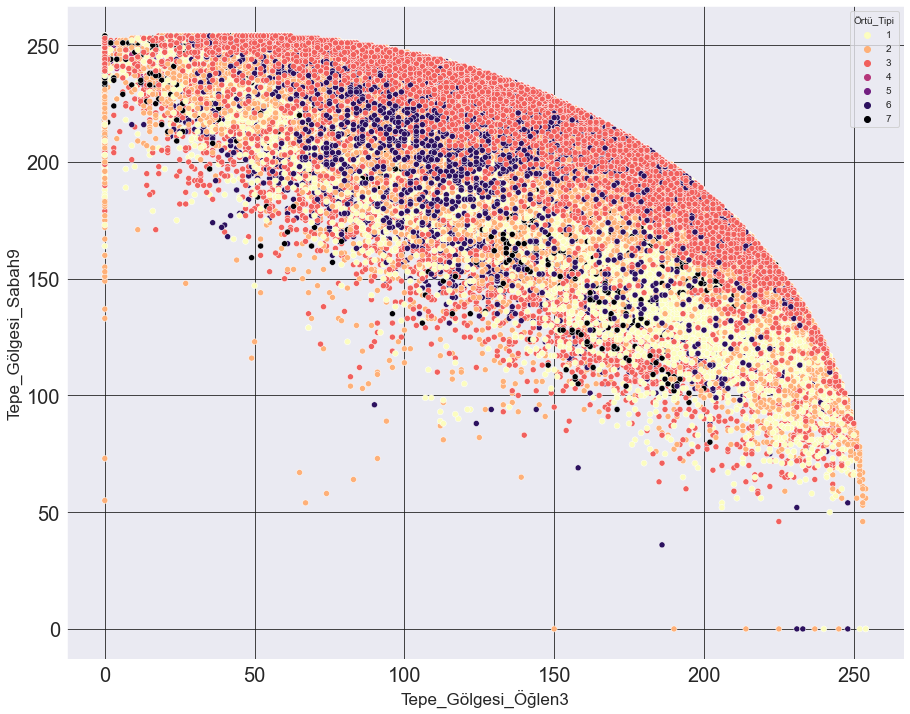

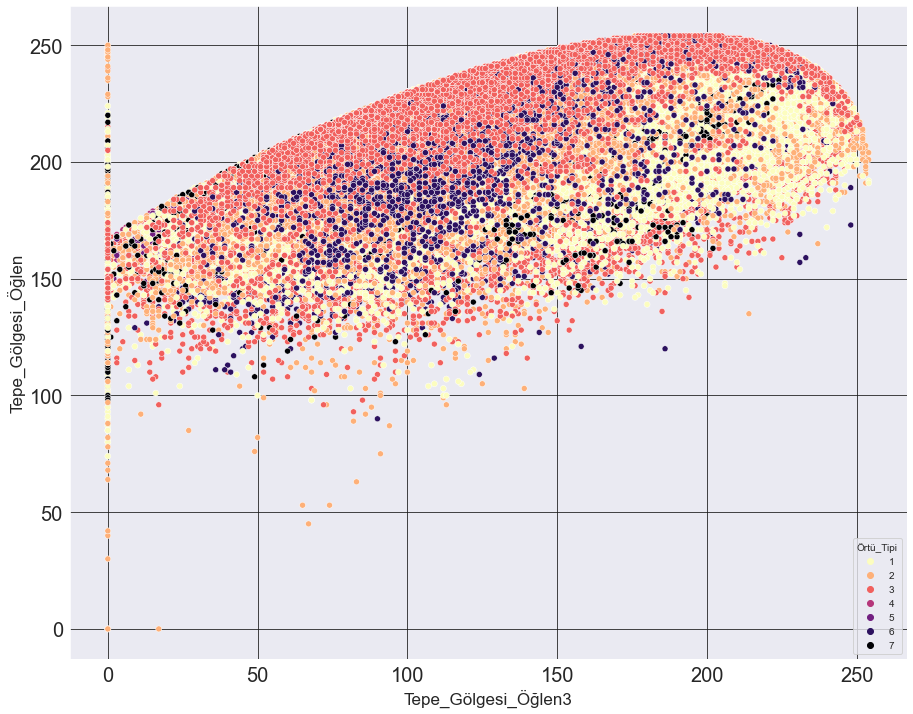

In [35]:
#Daha az korelasyona sahip olan veya hiç korelasyon göstermeyen özellikler siyah, pozitif korelasyona sahip özellikler ise negatif korelasyon için turuncu ve mavi olarak renklendirilir. Yukarıdaki şekilden de anlaşılacağı gibi, özniteliklerin korelasyon değerleri ilgili kutularında verilmiştir. Hillshade_3pm ve Hillshade_9am yüksek oranda negatif korelasyon gösterirken, hillshade_3pm ve Aspect en yüksek pozitif korelasyonu gösterir. Hillshade_3pm ve Aspect de orman örtüsü türleri sınıflarına kıyasla neredeyse normal bir dağılıma sahipti. (Plot 4.1) Korelasyona sahip diğer özellikler, Hidrolojiye Dikey ve Yatay Uzaklık, Hillshade_3m ve Hillshade_Noon, Hillshade_9am ve Aspect ve Hillshade_Noon ve Slope'dir. Yani toplamda 6 çift korelasyonumuz var. Daha Az Korelasyonlu değer, özelliklerin bize ve modele anlatacak farklı değerli bilgilere sahip olduğunu, dolayısıyla tahminler için önemli özellikler olduğunu söyler.
sns.set_style("darkgrid", {'grid.color': '.1'})
# yüksek korelasyona sahip özellik çiftleri
list_data_cor = [['Cephe','Tepe_Gölgesi_Öğlen3'], ['Cephe', 'Tepe_Gölgesi_Sabah9'], ['Eğim', 'Tepe_Gölgesi_Öğlen'], ['Suya_Yatay_Mesafe', 'Suya_Dikey_Mesafe'], 
                 ['Tepe_Gölgesi_Öğlen3', 'Tepe_Gölgesi_Sabah9'], ['Tepe_Gölgesi_Öğlen3', 'Tepe_Gölgesi_Öğlen']]
# iç listeden 2 özellik alma
for i,j in list_data_cor:
    plt.subplots(figsize=(15, 12))
    #x ekseninde ve y ekseninde, her nokta hangi orman örtüsüne ait olduğunu gösterme
    sns.scatterplot(data = data, x = i, y = j, hue="Örtü_Tipi", legend = 'full', palette='magma_r')
    
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.xlabel(i, size = 17)
    plt.ylabel(j, size = 17)
    plt.show()


In [37]:
# Random Forest Sınıflandırma İslemi
from sklearn.ensemble import RandomForestClassifier
X = data.iloc[:,:-1]

y = data['Örtü_Tipi']
# model alma
model = RandomForestClassifier(random_state = 53)
# model eğitme
model.fit(X, y)
# özellik önemini çıkarma ve azalan sırada bir veri çerçevesi oluşturma
RFC_feature_importances = pd.DataFrame(model.feature_importances_, index = X.columns,
                                       columns=['RFC']).sort_values('RFC', ascending=False)
model = None
RFC_feature_importances.head(10)

,RFC
Yükseklik,0.241649
Yollara_Mesafe,0.119780
Yangın_Noktalarına_Yatay_Mesafe,0.112541
Suya_Yatay_Mesafe,0.060863
Suya_Dikey_Mesafe,0.057490
Cephe,0.047144
Tepe_Gölgesi_Öğlen,0.041850
Tepe_Gölgesi_Öğlen3,0.040254
Tepe_Gölgesi_Sabah9,0.039989
Vahşi_Alan4,0.035370


In [40]:
sample = data[['Yükseklik','Yollara_Mesafe','Yangın_Noktalarına_Yatay_Mesafe','Suya_Yatay_Mesafe','Suya_Dikey_Mesafe','Yükseklik','Vahşi_Alan4',
            'Tepe_Gölgesi_Öğlen','Tepe_Gölgesi_Öğlen3','Tepe_Gölgesi_Sabah9','Eğim','Toprak_Tipi22','Toprak_Tipi10','Toprak_Tipi4','Toprak_Tipi34','Toprak_Tipi34','Vahşi_Alan3','Toprak_Tipi12',
            'Toprak_Tipi2','Vahşi_Alan1', 'Örtü_Tipi']]

In [41]:
# öznitelik ölçekleme işlevini import etme
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

#X için örnek öznitelikleri besleme
X = sample.iloc[:,:-1]

#Y için örnek öznitelikleri besleme
y = sample['Örtü_Tipi']

#özellik ölçeklemeyi tüm özelliklere uygula
X_scaled = scaler.fit_transform(X)

In [42]:
# öznitelik ölçeklendirmeden sonra veriler
X_scaled

array([[0.36568284, 0.05479837, 0.86783772, ..., 0.        , 0.        ,
        1.        ],
       [0.47273637, 0.44681748, 0.85333891, ..., 1.        , 0.        ,
        1.        ],
       [0.46323162, 0.4341717 , 0.86588596, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.26363182, 0.01264578, 0.11905758, ..., 0.        , 1.        ,
        0.        ],
       [0.26263132, 0.01264578, 0.12045169, ..., 0.        , 1.        ,
        0.        ],
       [0.26213107, 0.00941408, 0.12198522, ..., 0.        , 1.        ,
        0.        ]])

In [43]:
# modeli train-test olarak 2 ye bölme islemi
from sklearn.model_selection import train_test_split

# %75 - %25 / eğitim - test için ayırma 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 53)

In [44]:
# eğitim gözlem sayısı
print(X_train.shape, X_test.shape)

(435758, 20) (145253, 20)


In [45]:
# model performans ölçümü
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators = 50, random_state = 53)
clf = clf.fit(X_train, y_train)
predict = clf.predict(X_test)

# doğruluk hesaplama
accuracy = accuracy_score(y_test, predict)
# yüzde alma ve 3 basamağa yuvarlama
accuracy = np.round(accuracy * 100, 3)


clf = None

# sonuç
print("Random Forest Classifier ile eğitilen modelin test setindeki doğruluk oranı ", accuracy,"% 'dur.")

Random Forest Classifier ile eğitilen modelin test setindeki doğruluk oranı  95.669 % 'dur.
